In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
df=pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

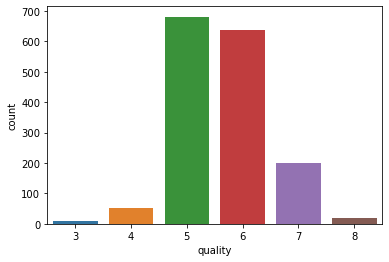

In [12]:
sns.countplot(x='quality', data=df)

The above distribution shows the range for response variable (quality) is between 3 to 8.

- create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.
- i.e. bad: 1-4
- average: 5-6
- good: 7-10

In [15]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [16]:
df.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


# Correlation between features and variables

<AxesSubplot:>

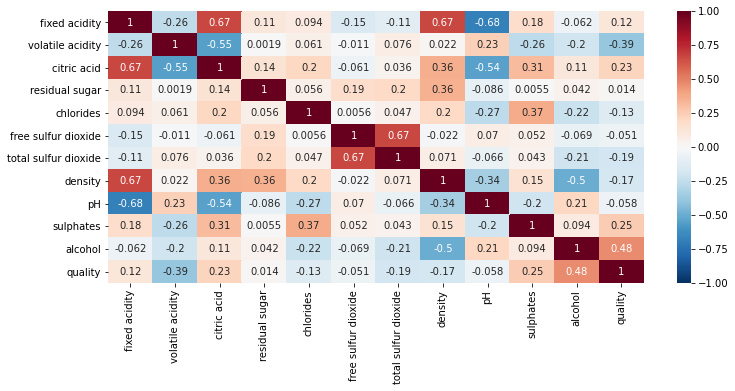

In [18]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [19]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

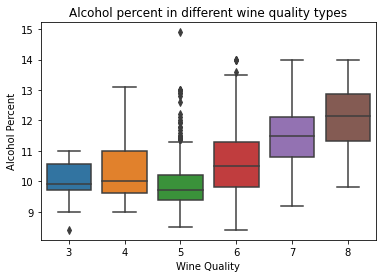

In [20]:
bx = sns.boxplot(x="quality", y='alcohol', data = df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

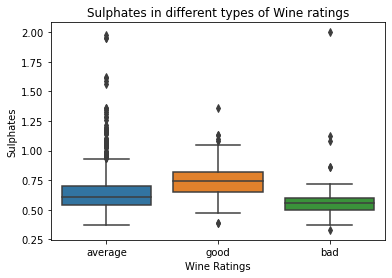

In [21]:
bx = sns.boxplot(x="rating", y='sulphates', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Xitric_acid in different types of Wine ratings')]

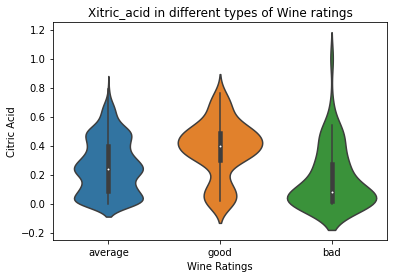

In [23]:
bx = sns.violinplot(x="rating", y='citric acid', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

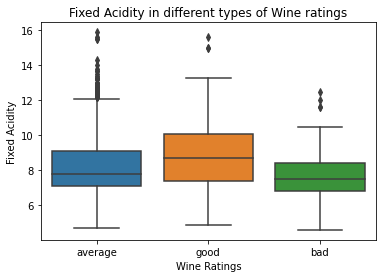

In [24]:
bx = sns.boxplot(x="rating", y='fixed acidity', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

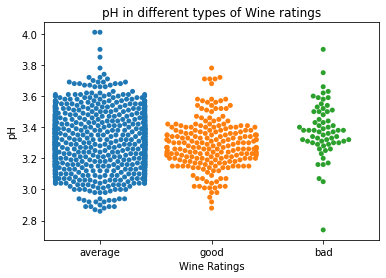

In [26]:
bx = sns.swarmplot(x="rating", y="pH", data = df)
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

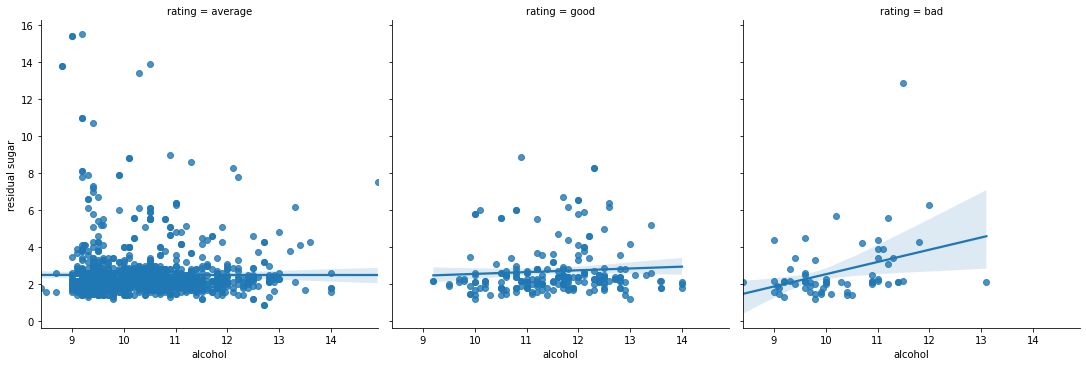

In [28]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = df)

In [32]:
y,X = dmatrices('quality ~ alcohol', data=df, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.83e-91
Time:                        20:40:54   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = sm.OLS.from_formula('quality ~ alcohol', data = df)
results = model.fit()
print(results.params)

Intercept    1.874975
alcohol      0.360842
dtype: float64


# Classification
## Classification using Statsmodel

In [39]:
df['rate_code'] = (df['quality'] > 4).astype(np.float32)

<AxesSubplot:ylabel='Density'>

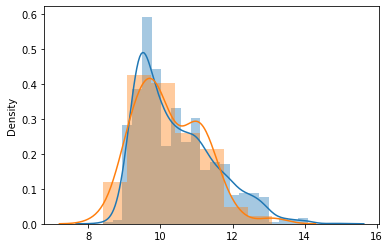

In [40]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

The above plot shows the higher probability for red wine quality will be good if alcohol percentage is more than equal to 12, whereas the same probability reduces as alcohol percentage decreases.

In [42]:
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2021-12-14 20:46 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

<AxesSubplot:ylabel='Density'>

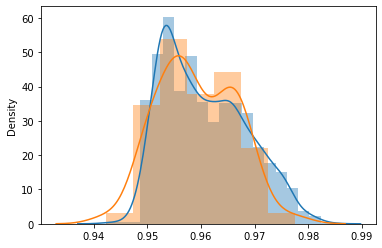

In [43]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [44]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



In [53]:
df=df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid'})
df.columns

Index(['fixed_acidity', 'volatile acidity', 'citric_acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating', 'rate code',
       'rate_code'],
      dtype='object')

# Classification using Sklearn's LogisticRegression:

In [54]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = df)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



# Classification using Sklearn's RandomForestClassifier:

In [55]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.75      0.05      0.09        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.86      0.52      0.54      1599
weighted avg       0.95      0.96      0.95      1599



# Conclusion

We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful.